In [1]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library("syuzhet")
library("ggplot2")

Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




In [2]:
text<-readLines('intel.txt')
TextDoc <- Corpus(VectorSource(text))

In [3]:
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
TextDoc <- tm_map(TextDoc, toSpace, "/")
TextDoc <- tm_map(TextDoc, toSpace, "@")
TextDoc <- tm_map(TextDoc, toSpace, "\\|")
# Convert the text to lower case
TextDoc <- tm_map(TextDoc, content_transformer(tolower))
# Remove numbers
TextDoc <- tm_map(TextDoc, removeNumbers)
# Remove english common stopwords
TextDoc <- tm_map(TextDoc, removeWords, stopwords("english"))
# Remove your own stop word
# specify your custom stopwords as a character vector
TextDoc <- tm_map(TextDoc, removeWords, c("s", "company", "team")) 
# Remove punctuations
TextDoc <- tm_map(TextDoc, removePunctuation)
# Eliminate extra white spaces
TextDoc <- tm_map(TextDoc, stripWhitespace)
# Text stemming - which reduces words to their root form
TextDoc <- tm_map(TextDoc, stemDocument)

Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "\\|"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, removeWords, c("s", "company", "team")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(TextDoc, stemDocument):

In [4]:
# Build a term-document matrix
TextDoc_dtm <- TermDocumentMatrix(TextDoc)
dtm_m <- as.matrix(TextDoc_dtm)
# Sort by descearing value of frequency
dtm_v <- sort(rowSums(dtm_m),decreasing=TRUE)
dtm_d <- data.frame(word = names(dtm_v),freq=dtm_v)
# Display the top 5 most frequent words
head(dtm_d, 10)

,word,freq
,<chr>,<dbl>
intel,intel,60
stock,stock,40
chip,chip,24
market,market,17
share,share,15
year,year,13
manufactur,manufactur,11
rate,rate,11
intc,intc,11


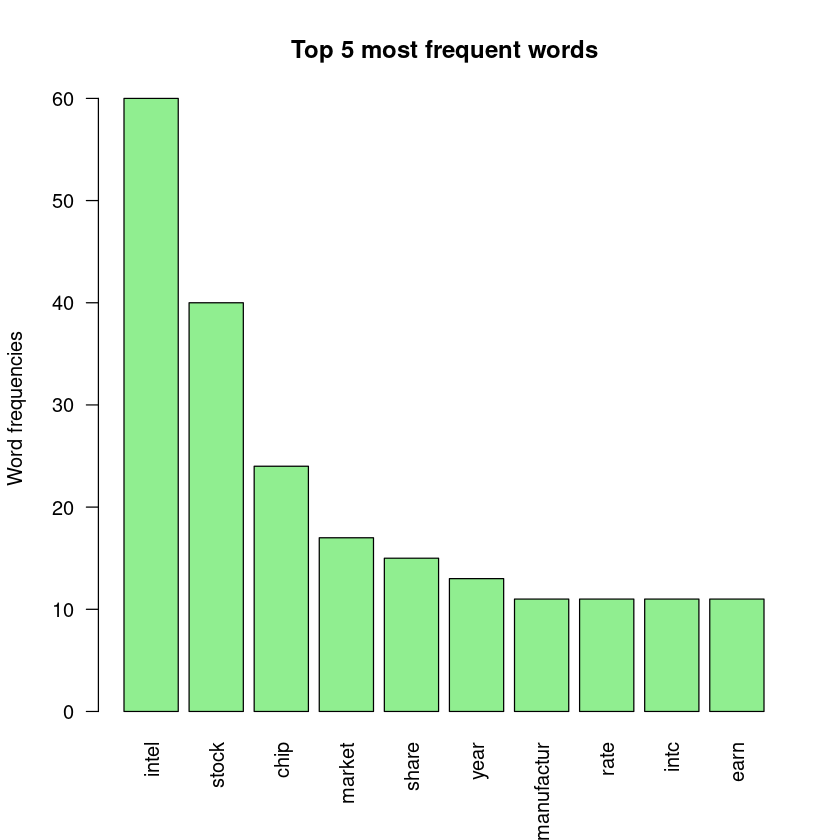

In [5]:
barplot(dtm_d[1:10,]$freq, las = 2, names.arg = dtm_d[1:10,]$word,
        col ="lightgreen", main ="Top 5 most frequent words",
        ylab = "Word frequencies")

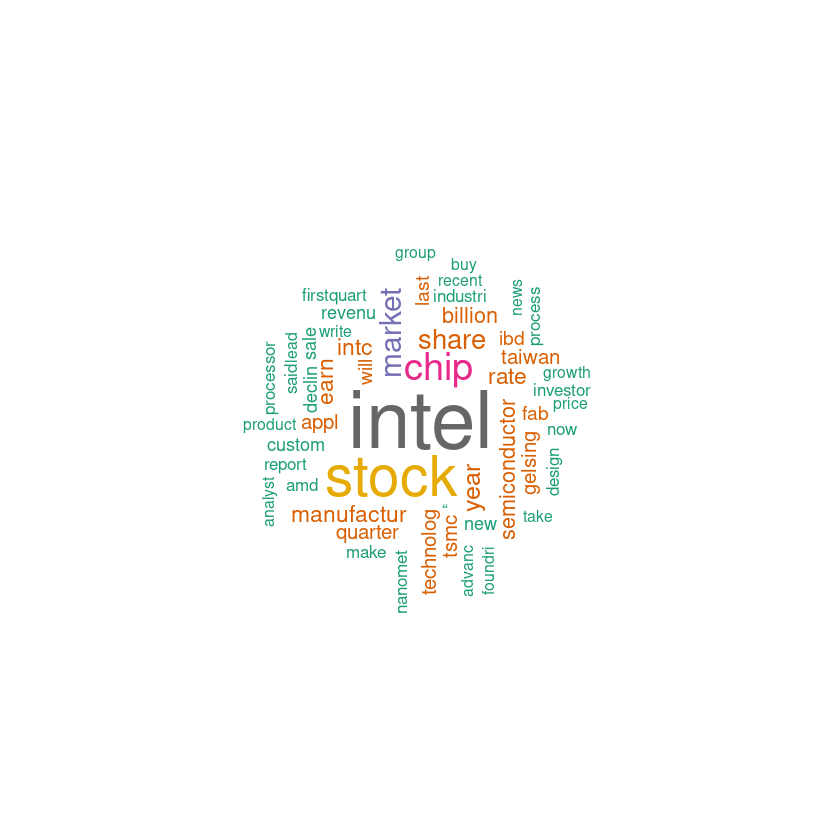

In [6]:
set.seed(1234)
wordcloud(words = dtm_d$word, freq = dtm_d$freq, min.freq = 5,
          max.words=100, random.order=FALSE, rot.per=0.40, 
          colors=brewer.pal(8, "Dark2"))

In [7]:
findAssocs(TextDoc_dtm, terms = c("good","work","health"), corlimit = 0.25)			

$good
        build       develop         europ         major        outlin 
         1.00          1.00          1.00          1.00          1.00 
         plus         spend          plan         becom        global 
         1.00          1.00          0.82          0.70          0.70 
      arizona        provid         capac      progress          serv 
         0.70          0.70          0.70          0.70          0.70 
          two         march       announc          also       foundri 
         0.57          0.57          0.57          0.49          0.44 
         said          make           new semiconductor        custom 
         0.40          0.40          0.37          0.30          0.29 
      nanomet           fab 
         0.28          0.25 

$work
numeric(0)

$health
numeric(0)

In [8]:
findAssocs(TextDoc_dtm, terms = findFreqTerms(TextDoc_dtm, lowfreq = 50), corlimit = 0.25)

$intel
          share         billion          expect            earn          adjust 
           0.50            0.45            0.45            0.44            0.42 
           sale   semiconductor         earlier          period          second 
           0.40            0.34            0.33            0.33            0.33 
           june             ceo         gelsing             pat         financi 
           0.33            0.31            0.31            0.31            0.31 
        quarter      manufactur             dip         predict       yearearli 
           0.31            0.30            0.30            0.30            0.30 
          chief           assum             bob             feb          fiscal 
           0.30            0.30            0.30            0.30            0.30 
            jan            mind           offic        previous          replac 
           0.30            0.30            0.30            0.30            0.30 
           swan technologyfocus             top             vmw          vmware 
           0.30            0.30            0.30            0.30            0.30 
           chip            year        investor             now       technolog 
           0.29            0.29            0.29            0.29            0.26 
         market          revenu 
           0.26            0.25

In [9]:
# regular sentiment score using get_sentiment() function and method of your choice
# please note that different methods may have different scales
syuzhet_vector <- get_sentiment(text, method="syuzhet")
# see the first row of the vector
head(syuzhet_vector)
# see summary statistics of the vector
summary(syuzhet_vector)

[1] -0.60  0.00 -0.50  0.00  0.00 -1.25

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.9000  0.0000  0.0000  0.3065  0.3750  3.2000 

In [10]:
# bing
bing_vector <- get_sentiment(text, method="bing")
head(bing_vector)
summary(bing_vector)
#affin
afinn_vector <- get_sentiment(text, method="afinn")
head(afinn_vector)
summary(afinn_vector)

[1]  0  0  0  0  0 -2

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-5.000000  0.000000  0.000000 -0.009346  0.000000  2.000000 

[1] -3  0 -2  0  0 -3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -6.000   0.000   0.000   0.514   0.000   8.000 

In [11]:
#compare the first row of each vector using sign function
rbind(
  sign(head(syuzhet_vector)),
  sign(head(bing_vector)),
  sign(head(afinn_vector))
)

-1,0,-1,0,0,-1
0,0,0,0,0,-1
-1,0,-1,0,0,-1


In [12]:
# run nrc sentiment analysis to return data frame with each row classified as one of the following
# emotions, rather than a score: 
# anger, anticipation, disgust, fear, joy, sadness, surprise, trust 
# It also counts the number of positive and negative emotions found in each row
d<-get_nrc_sentiment(text)
# head(d,10) - to see top 10 lines of the get_nrc_sentiment dataframe
head (d,10)

Warning message:
“`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`group_by_()` is deprecated as of dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,1,3,1,4,0,1,4,3
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,2,1,0,4,2,1,0,2,4,5
7,0,0,0,0,0,0,0,0,0,0
8,1,2,0,2,0,1,0,1,3,1
9,0,0,0,0,0,0,0,0,0,0


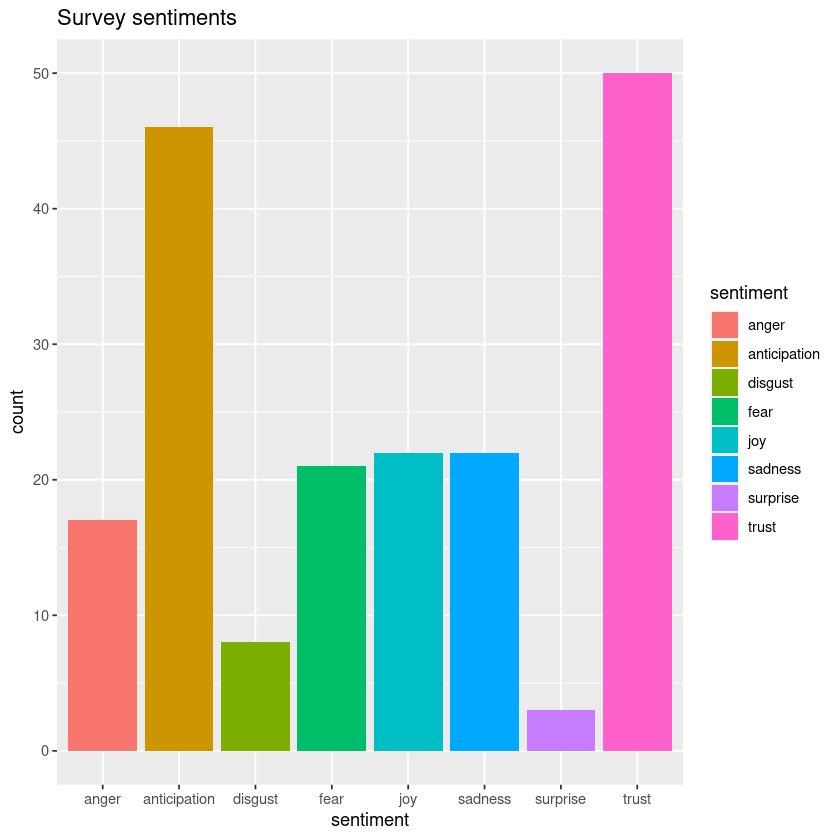

In [13]:
#transpose
td<-data.frame(t(d))
#The function rowSums computes column sums across rows for each level of a grouping variable.
td_new <- data.frame(rowSums(td[2:107]))
#Transformation and cleaning
names(td_new)[1] <- "count"
td_new <- cbind("sentiment" = rownames(td_new), td_new)
rownames(td_new) <- NULL
td_new2<-td_new[1:8,]
#Plot One - count of words associated with each sentiment
quickplot(sentiment, data=td_new2, weight=count, geom="bar", fill=sentiment, ylab="count")+ggtitle("Survey sentiments")

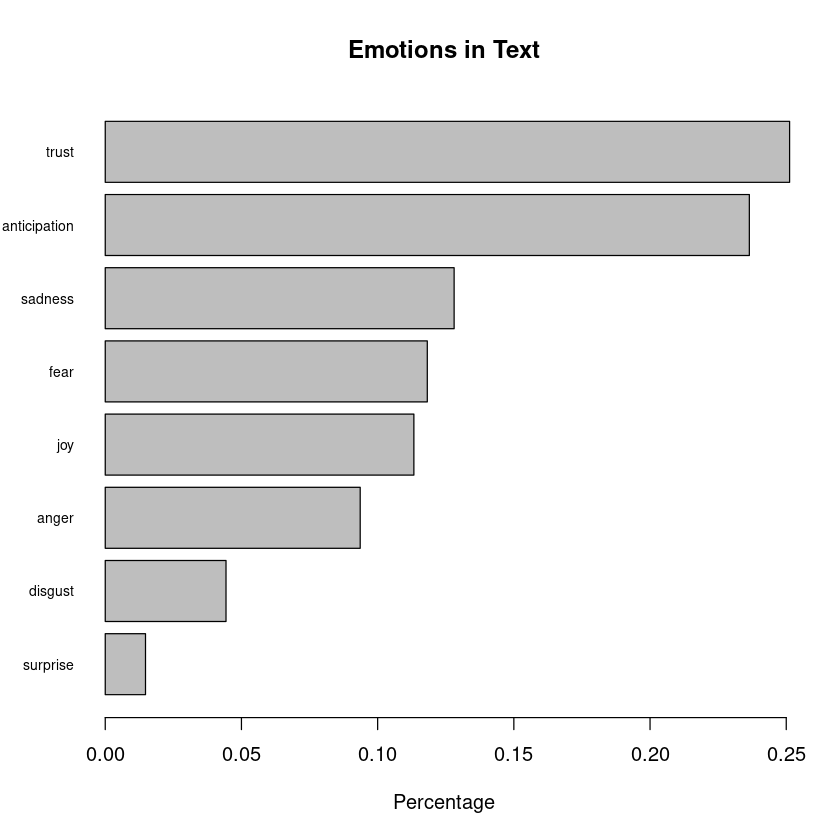

In [14]:
#Plot two - count of words associated with each sentiment, expressed as a percentage
barplot(
  sort(colSums(prop.table(d[, 1:8]))), 
  horiz = TRUE, 
  cex.names = 0.7, 
  las = 1, 
  main = "Emotions in Text", xlab="Percentage"
)